In [24]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [27]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==6).all()

In [28]:
#  3. Convert the June temperatures to a list.
junetemps = list((june))

In [29]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(junetemps,columns=['date', 'June Temps'])
june_df.set_index(june_df['date'], inplace=True)

In [32]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [33]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==12).all()

In [34]:
# 7. Convert the December temperatures to a list.
dectemps = list((december))

In [35]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dectemps,columns=['date', 'December Temps'])
dec_df.set_index(dec_df['date'], inplace=True)

In [36]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

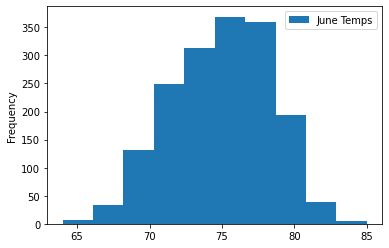

In [38]:
june_df.plot.hist()

<AxesSubplot:ylabel='Frequency'>

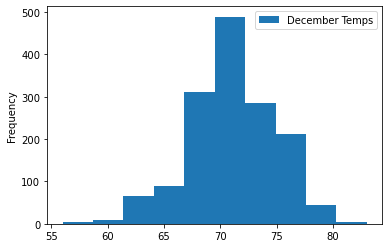

In [39]:
dec_df.plot.hist()

In [41]:
# Deliverable 3: additional queries for months February and October 

# February 
february = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==2).all()
febtemps = list((february))
feb_df = pd.DataFrame(febtemps,columns=['date', 'February Temps'])
feb_df.set_index(feb_df['date'], inplace=True)

In [42]:
feb_df.describe()

,February Temps
count,1610.000000
mean,69.442236
std,3.981399
min,56.000000
25%,67.000000
50%,70.000000
75%,72.000000
max,83.000000


In [43]:
# October
october = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==10).all()
octtemps = list((october))
oct_df = pd.DataFrame(octtemps,columns=['date', 'October Temps'])
oct_df.set_index(oct_df['date'], inplace=True)

In [44]:
oct_df.describe()

,October Temps
count,1556.000000
mean,75.391388
std,3.545084
min,64.000000
25%,73.000000
50%,76.000000
75%,78.000000
max,86.000000
